In [23]:
from xml.etree import ElementTree
import glob
from tensorflow import keras
import tensorflow as tf
import sklearn
from skimage import draw
from skimage.io import imshow, imread
from skimage import morphology
import numpy as np
from matplotlib import pyplot

In [3]:
et = ElementTree.parse("CVATdata/annotations.xml")

In [4]:
image_names = sorted(glob.glob("CVATdata/images/training/*.png"))

In [13]:
masks = {}
for img in et.findall('image'):
    width = int(img.attrib['width']) + 1
    height = int(img.attrib['height']) + 1
    blank = np.zeros(shape=(height,width),dtype=np.uint8)
    polys = img.findall('polyline')
    for poly in polys:
        attribs = poly.attrib
        pstr = attribs['points']
        pairs = pstr.split(';')
        coord_list = []
        for pair in pairs:
            xstr,ystr = pair.split(',')
            x = float(xstr)
            y = float(ystr)
            coord_list.append((x,y))
        for i in range(len(coord_list) - 1):
            start = coord_list[i]
            end = coord_list[i + 1]
            line = draw.line(round(start[1]),round(start[0]),round(end[1]),round(end[0]))
            blank[line] = np.uint8(255)
    masks[img.attrib['name']] = blank

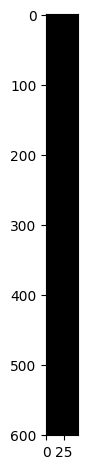

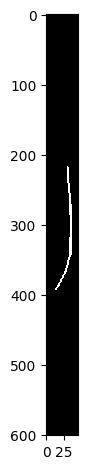

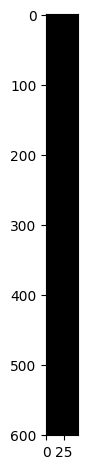

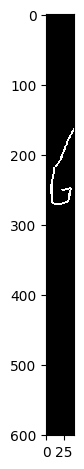

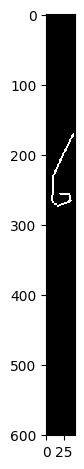

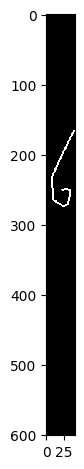

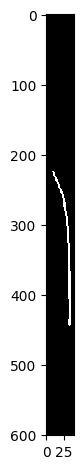

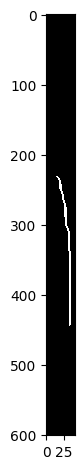

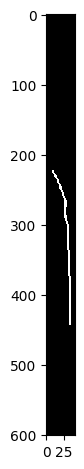

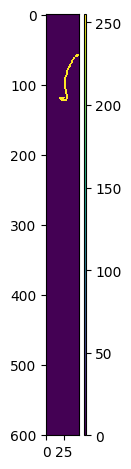

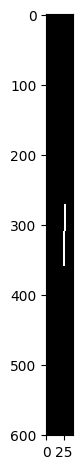

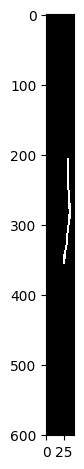

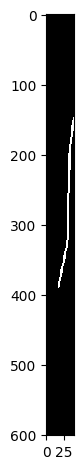

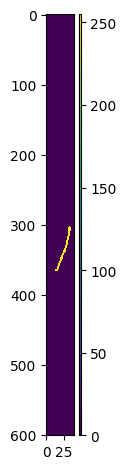

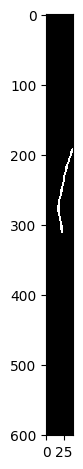

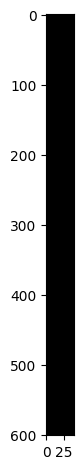

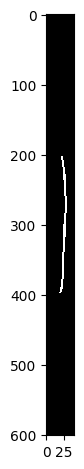

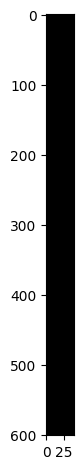

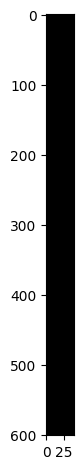

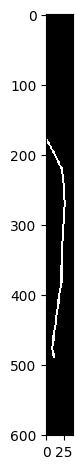

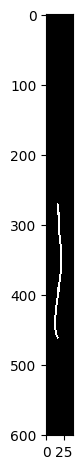

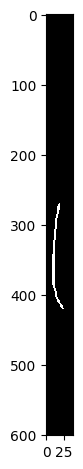

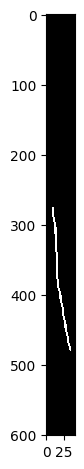

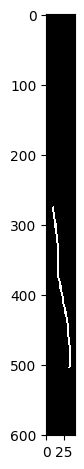

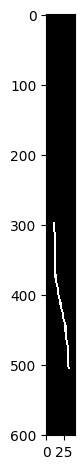

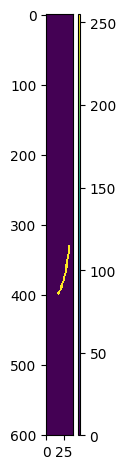

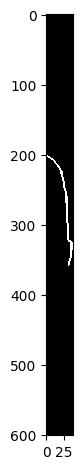

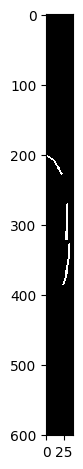

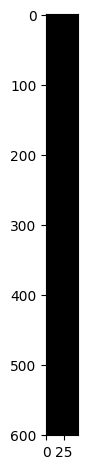

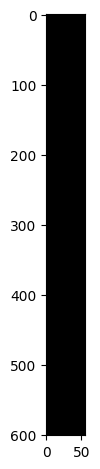

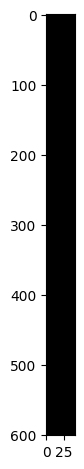

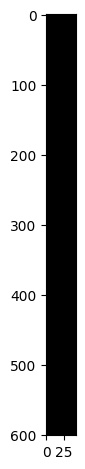

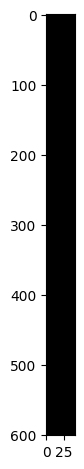

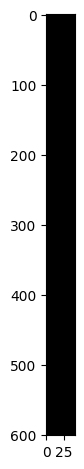

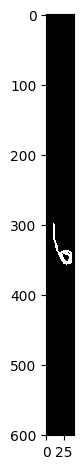

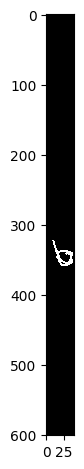

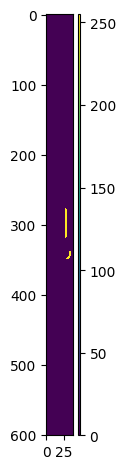

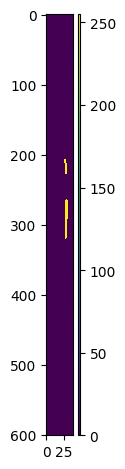

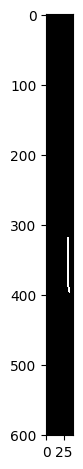

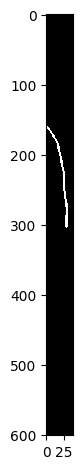

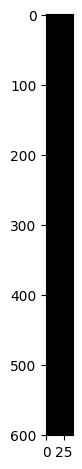

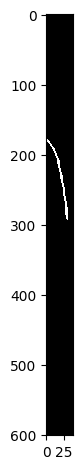

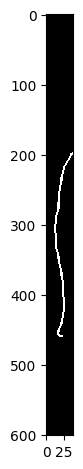

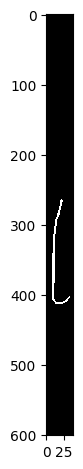

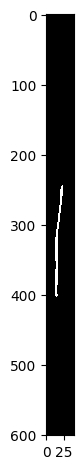

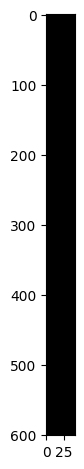

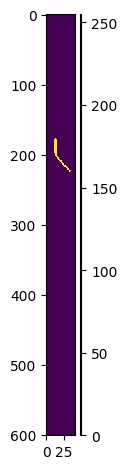

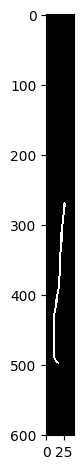

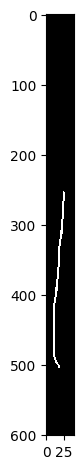

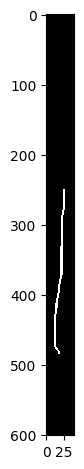

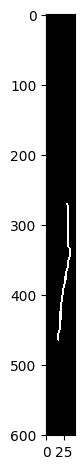

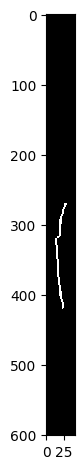

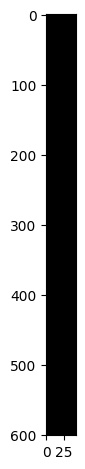

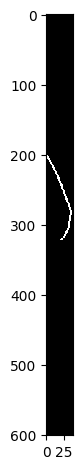

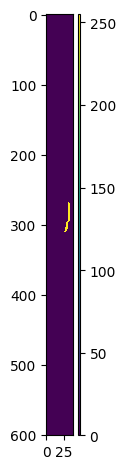

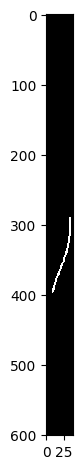

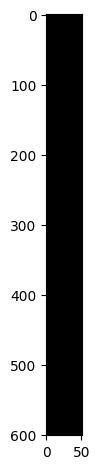

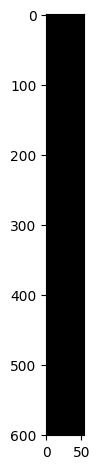

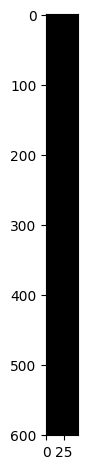

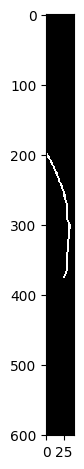

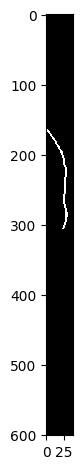

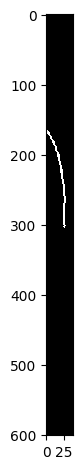

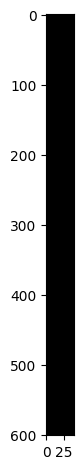

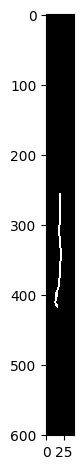

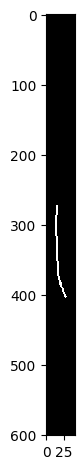

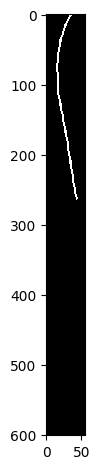

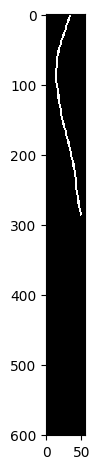

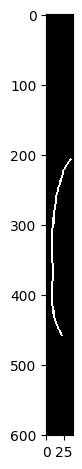

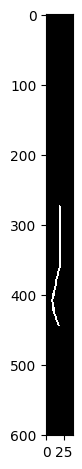

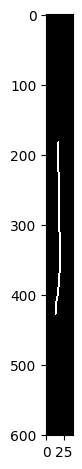

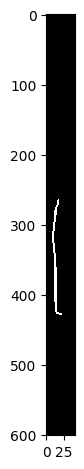

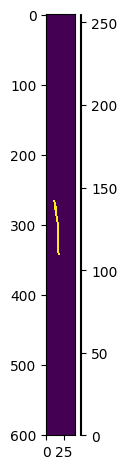

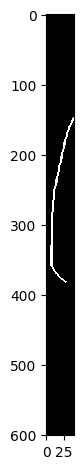

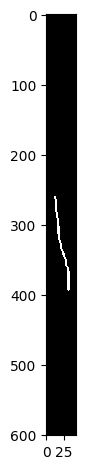

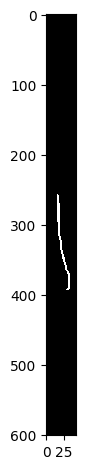

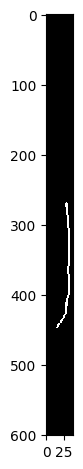

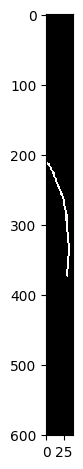

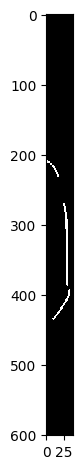

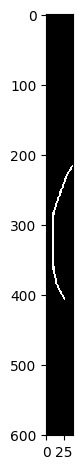

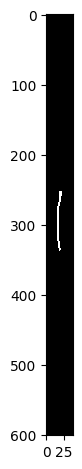

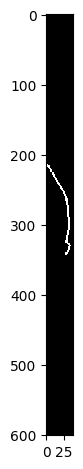

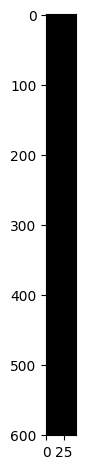

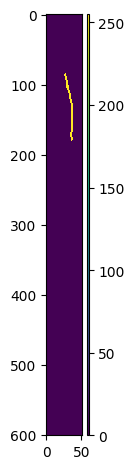

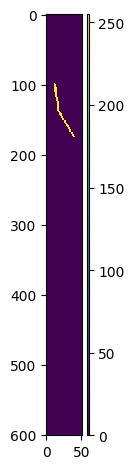

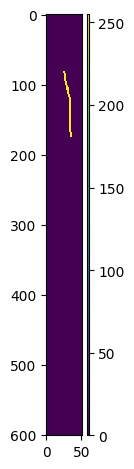

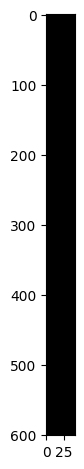

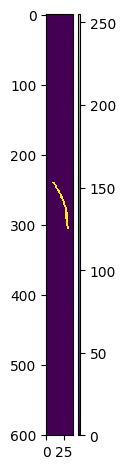

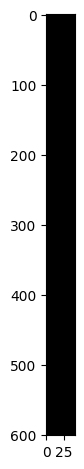

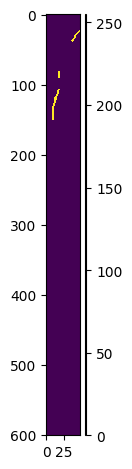

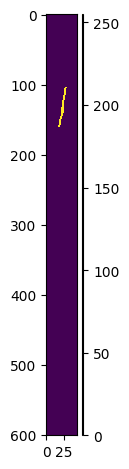

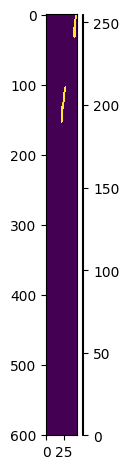

In [24]:
for m in masks.values():
    imshow(morphology.dilation(m))
    pyplot.show()

In [21]:
images = {}
for name in image_names:
    data = imread(name)
    images[name] = data

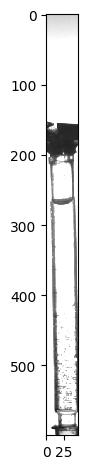

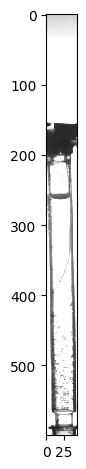

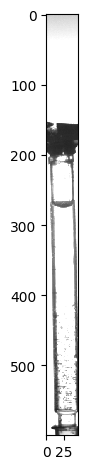

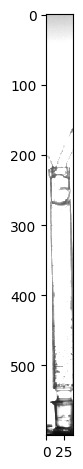

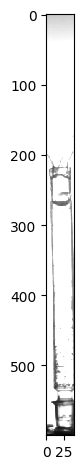

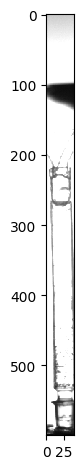

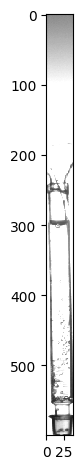

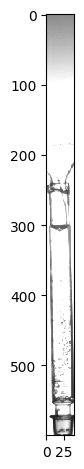

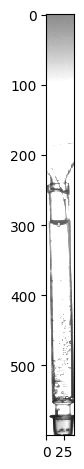

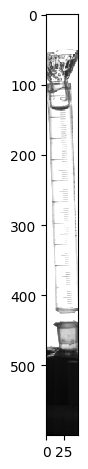

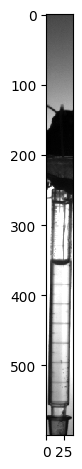

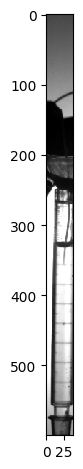

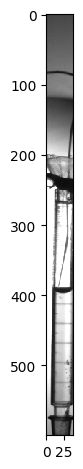

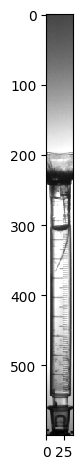

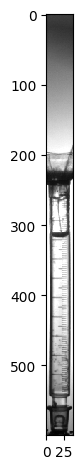

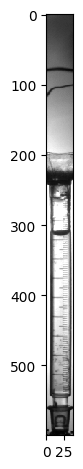

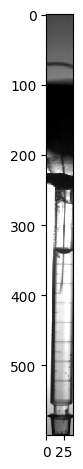

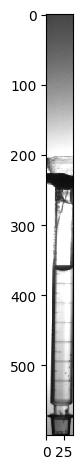

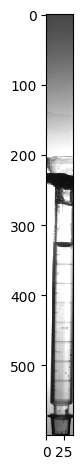

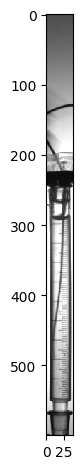

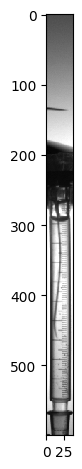

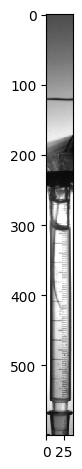

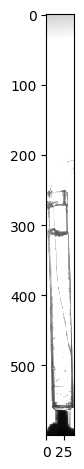

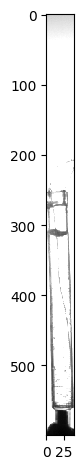

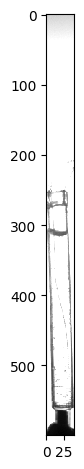

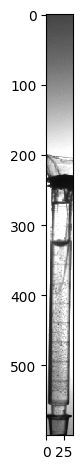

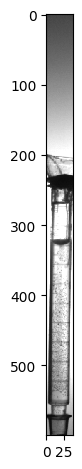

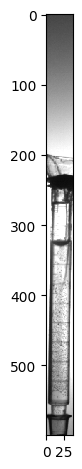

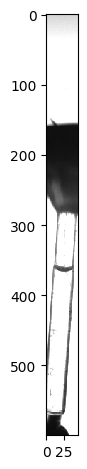

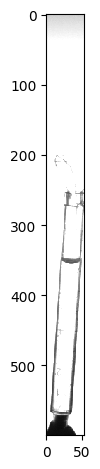

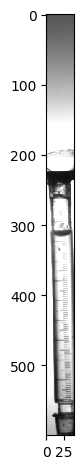

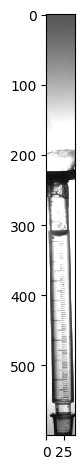

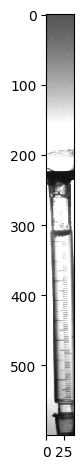

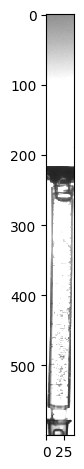

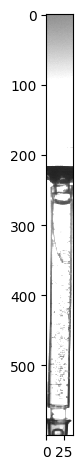

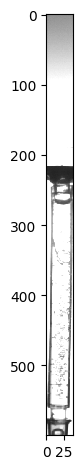

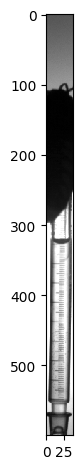

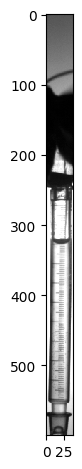

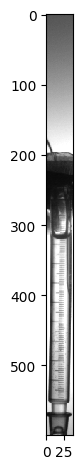

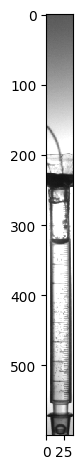

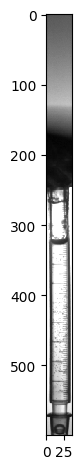

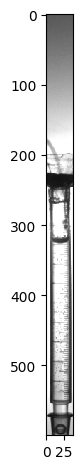

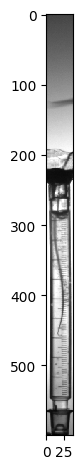

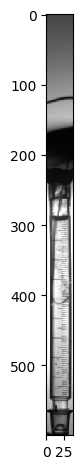

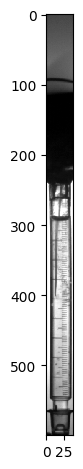

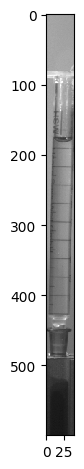

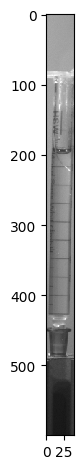

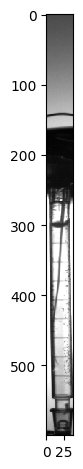

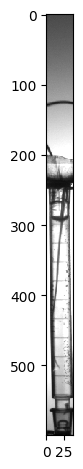

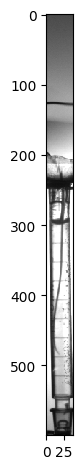

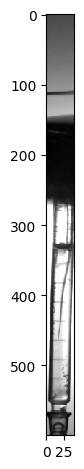

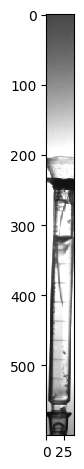

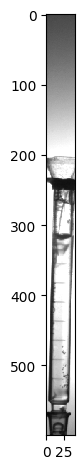

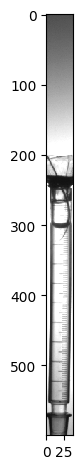

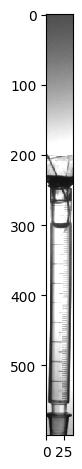

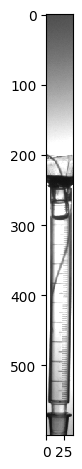

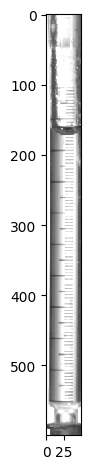

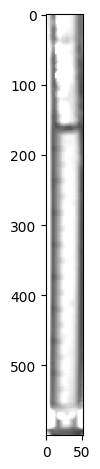

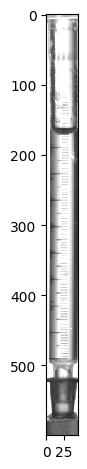

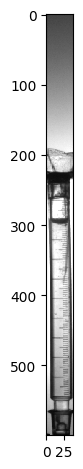

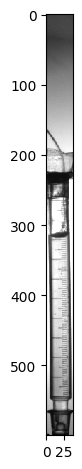

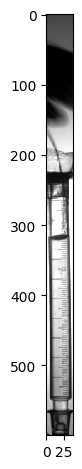

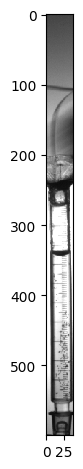

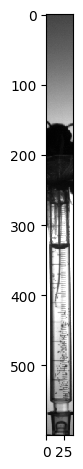

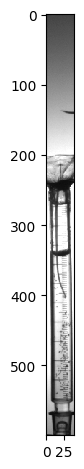

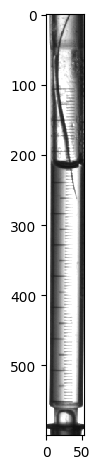

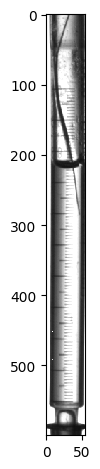

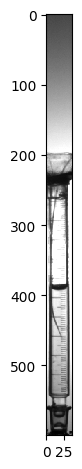

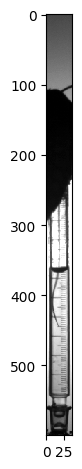

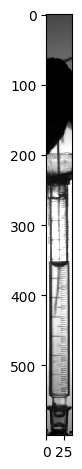

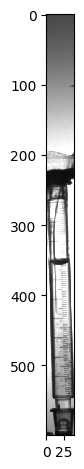

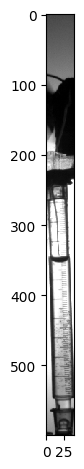

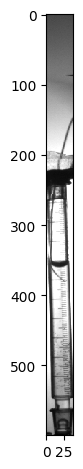

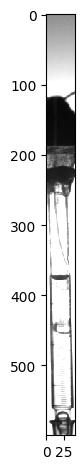

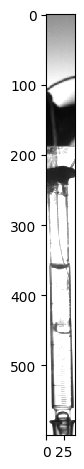

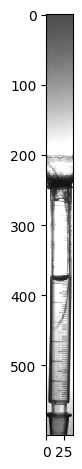

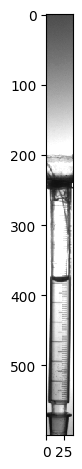

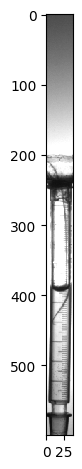

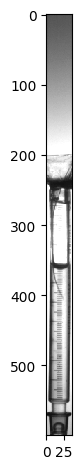

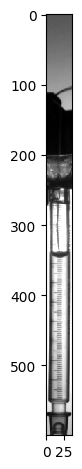

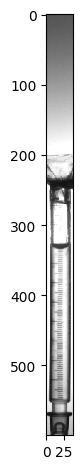

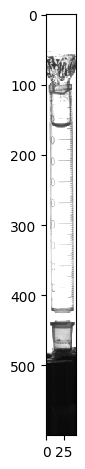

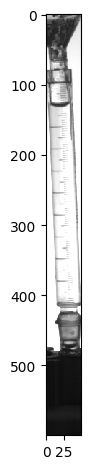

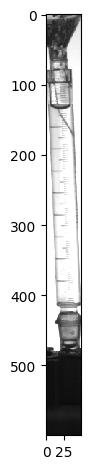

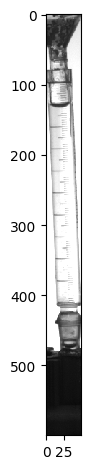

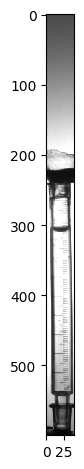

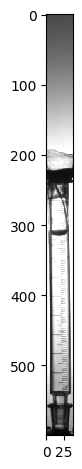

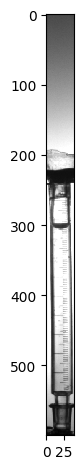

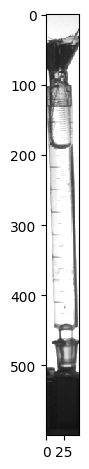

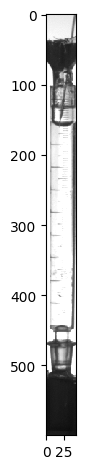

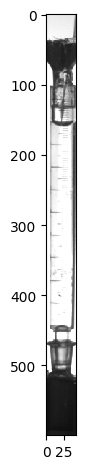

In [22]:
for i in images.values():
    imshow(i)
    pyplot.show()

In [25]:
image_names[0]

'CVATdata/images/training/img0_1.png'

In [30]:
names = [image_name[16:] for image_name in image_names]

In [45]:
pairs = []
cross = zip(names, image_names)
for short_name, long_name in cross:
    mask = masks[short_name]
    trainee = images[long_name]
    pairs.append((trainee, morphology.dilation(mask[:-1,:-1])))

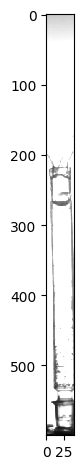

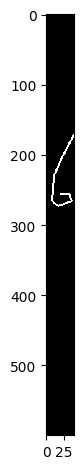

In [46]:
t,m = pairs[4]
imshow(t)
pyplot.show()
imshow(m)
pyplot.show()

In [47]:
for t,m in pairs:
    print(t.shape)

(600, 45)
(600, 44)
(600, 45)
(600, 39)
(600, 40)
(600, 40)
(600, 39)
(600, 40)
(600, 40)
(600, 46)
(600, 38)
(600, 39)
(600, 39)
(600, 39)
(600, 38)
(600, 39)
(600, 39)
(600, 39)
(600, 39)
(600, 38)
(600, 38)
(600, 38)
(600, 40)
(600, 40)
(600, 40)
(600, 38)
(600, 38)
(600, 38)
(600, 45)
(600, 54)
(600, 40)
(600, 41)
(600, 40)
(600, 40)
(600, 39)
(600, 39)
(600, 38)
(600, 38)
(600, 38)
(600, 38)
(600, 37)
(600, 38)
(600, 38)
(600, 38)
(600, 39)
(600, 40)
(600, 40)
(600, 39)
(600, 39)
(600, 39)
(600, 40)
(600, 40)
(600, 41)
(600, 38)
(600, 38)
(600, 38)
(600, 50)
(600, 53)
(600, 45)
(600, 39)
(600, 38)
(600, 38)
(600, 39)
(600, 39)
(600, 40)
(600, 54)
(600, 55)
(600, 37)
(600, 37)
(600, 37)
(600, 40)
(600, 40)
(600, 39)
(600, 41)
(600, 41)
(600, 38)
(600, 38)
(600, 38)
(600, 37)
(600, 37)
(600, 38)
(600, 42)
(600, 50)
(600, 50)
(600, 50)
(600, 40)
(600, 38)
(600, 40)
(600, 47)
(600, 43)
(600, 43)
